<a href="https://colab.research.google.com/github/abraham-john-paul/AppliedAICourse/blob/main/Assignment_4_Instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

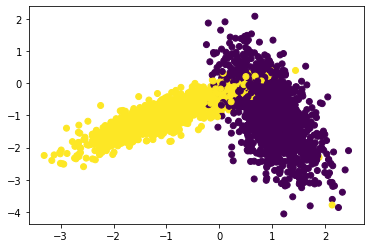

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import random
import warnings
warnings.filterwarnings("ignore")

In [23]:
def generateFoldIndices(n, folds):
    if isinstance(n, (int,)) and isinstance(folds, (int,)):
        if n < 1 or n < folds:
            return list()
        indices = list(range(n))
        # Generating random shuffle of no.s from '0' to 'n - 1'
        random.shuffle(indices)
        # Finding no. of elements in one fold in K-fold
        fold_size = n // folds
        fold_indices = list()
        for i in range(0, n, fold_size):
            if n - (i + fold_size) >= fold_size:
                fold_indices.append(indices[i:i + fold_size])
            else:
                fold_indices.append(indices[i:])
                break
        return fold_indices
    else:
        print("enter a list size greater than 0")

def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    ''' x_train: its numpy array of shape, (n,d)
        y_train: its numpy array of shape, (n,) or (n,1)
        classifier: its typically KNeighborsClassifier()
        param_range: its a tuple like (a,b) a < b
        folds: an integer, represents number of folds we need to devide the data and test our model
    '''
    trainscores = []
    testscores  = []
    # Generating 10 random k values from the param_range provided
    params = numpy.random.randint(param_range[0], param_range[1], 10)
    n_x_train = len(x_train)
    fold_indices = generateFoldIndices(n_x_train, folds)
    for k in tqdm(params):
        trainscores_folds = []
        testscores_folds  = []
        for cv_list_indices in fold_indices:
            train_list_indices = list(set(fold_indices) - set(cv_list_indices))
            # selecting the data points based on the train_indices and test_indices
            X_train = x_train[train_list_indices]
            Y_train = y_train[train_list_indices]
            X_test  = x_train[cv_list_indices]
            Y_test  = y_train[cv_list_indices]

            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)

            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    retrun trainscores, testscores

kNN_Classifier = KNeighborsClassifier()
param_range = (1, 50)
folds = 5

trainscores,testscores = RandomSearchCV(X_train,y_train, kNN_Classifier, param_range, folds)

plt.plot(params['n_neighbors'],trainscores, label='train cruve')
plt.plot(params['n_neighbors'],testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

[[1621, 1466, 1253, 6743, 1879, 1520, 3505, 1839, 7135, 5501, 4520, 893, 6512, 6920, 5247, 6312, 3119, 5172, 4072, 4799, 191, 5153, 6997, 4710, 6519, 3747, 391, 3590, 3660, 4984, 4899, 4636, 6440, 1274, 2726, 2375, 739, 2708, 2757, 2297, 6448, 6148, 4151, 5604, 7041, 6747, 2309, 2815, 2393, 1039, 2628, 2751, 7177, 415, 5167, 6917, 5610, 5433, 6612, 2050, 1981, 3428, 3373, 4140, 5726, 4780, 3237, 1908, 479, 2189, 2442, 3352, 756, 3059, 1904, 230, 2424, 1283, 5218, 283, 1278, 4578, 1040, 4438, 3729, 3754, 4763, 3198, 6888, 7039, 5082, 2495, 4692, 2576, 6473, 5110, 921, 3798, 3953, 422, 4856, 5078, 5720, 3202, 3711, 4327, 5766, 3677, 7195, 6783, 1779, 6824, 2521, 3416, 2598, 3667, 1518, 5266, 5716, 392, 1161, 5729, 1201, 5486, 1762, 3463, 525, 5205, 5701, 3272, 452, 86, 4006, 4543, 9, 5751, 3841, 1639, 3273, 141, 5580, 2196, 2611, 2803, 2844, 4226, 2177, 7424, 4926, 6307, 2048, 3136, 2061, 1355, 5008, 1359, 6507, 537, 5799, 2296, 5903, 1343, 4018, 1259, 2764, 6522, 1191, 4347, 6453, 5521,